# Random Forest Iris Dataset

In [1]:
# Standard imports
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Dataset
from sklearn.datasets import load_iris

# For model and evaluation
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix 

# For graphing
from matplotlib.colors import ListedColormap

For this example, we use the Iris dataset, which we have seen before. While this dataset has 4 features, we will reduce the number of features to 2 so we can better graph our results. This also makes the classification harder because we need all four features to capture the classification relationship. 

In [2]:
# Load the Iris dataset
data = load_iris()
X = data.data
y = data.target
X = X[:,0:2] # reduce the dimension to 2D so we can graph it and the classification problem is harder

# Split the data into training, validation, and testing sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=19)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=19)

# For fitting the function once hyperparameters are selected
X_train_val = np.concatenate((X_train, X_val))
y_train_val = np.concatenate((y_train, y_val))

## Random Forests

A Random Forest is a machine learning algorithm that builds upon the idea of decision trees but adds a layer of randomness and diversity to improve prediction accuracy and reduce overfitting. First, let's list some facts about decision trees to better understand their differences with random forests. 

### Decision Tree Classifier

1. **Single Tree**: A decision tree classifier builds a single tree-like structure to make predictions.
2. **Bias and Variance**: It can have high variance, meaning it's prone to overfitting (fitting the training data too closely) and may not generalize well to new, unseen data.
3. **Feature Selection**: It selects features and thresholds based on their informativeness for each split, aiming to make the best decisions.
4. **Predictions**: New data points are classified by traversing the tree from the root to a leaf node based on their feature values.

   
### Random Forest Classifier

1. **Ensemble of Trees**: A random forest is an ensemble learning method that combines multiple decision trees combined into a "forest" of trees.
2. **Randomness**: It introduces randomness in two ways: by randomly selecting a subset of features for each tree and by bootstrapping (randomly sampling with replacement) the training data for each tree.
3. **Reduced Overfitting**: The randomness reduces overfitting because each tree is trained on a different subset of data and features. This diversity helps improve generalization.
4. **Voting**: For classification tasks, a random forest combines the predictions of individual trees using majority voting. For regression tasks, it averages the predictions.
5. **Predictions**: New data points are passed through each tree in the forest, and their predictions are combined to make a final prediction.
   
### Comparisons

- **Diversity**: A decision tree classifier is a single model, while a random forest consists of multiple decision trees. This ensemble approach introduces diversity among the trees.
- **Overfitting**: Decision trees can easily overfit, whereas random forests are less prone to overfitting due to the combination of diverse trees.
- **Accuracy**: Random forests often achieve higher accuracy on both training and validation data compared to individual decision trees.
- **Robustness**: Random forests are more robust to noisy data and outliers because they consider multiple perspectives.
Complexity: Decision trees are simple to understand and visualize, while random forests are more complex due to the ensemble of trees.
- **Training Time**: Random forests may require more training time because they involve training multiple decision trees.
- 
In essence, a random forest is like a group of decision-making experts (the trees) who vote on the best choice. By combining their opinions, it often results in more accurate and robust predictions compared to a single decision tree.

The example below uses the same iris dataset. We provide the code for fitting and for graphing. Notice that the hyperparameter here is the number of trees in the ensemble. This is something we will select later using metrics on the validation set. 

In [3]:
# Create a Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=25, random_state=20)

# Fit the model to the training data
rf_classifier.fit(X_train, y_train)

# Make predictions on the validation data
y_pred = rf_classifier.predict(X_val)

# Display a classification report with precision, recall, and F1-score
report = classification_report(y_val, y_pred, target_names=data.target_names)
print("Classification Report:\n", report)


Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        12
  versicolor       0.54      0.78      0.64         9
   virginica       0.60      0.33      0.43         9

    accuracy                           0.73        30
   macro avg       0.71      0.70      0.69        30
weighted avg       0.74      0.73      0.72        30



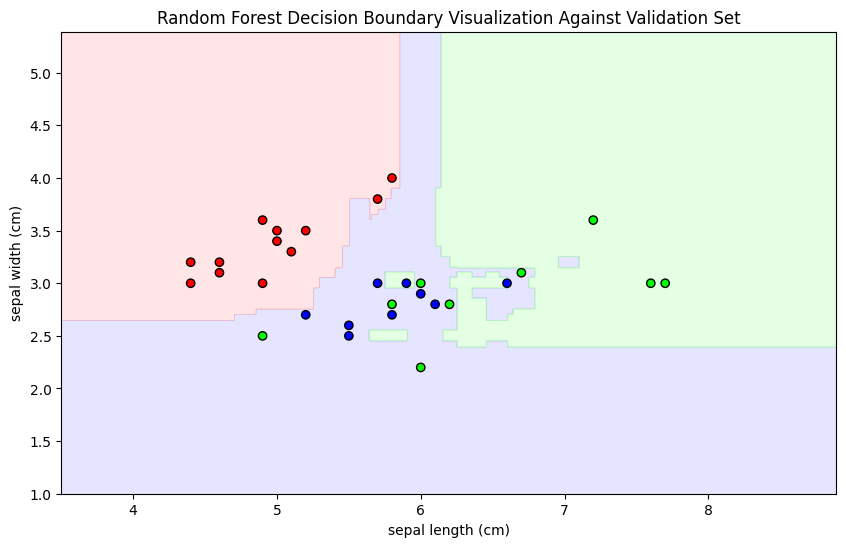

In [4]:
# Create a meshgrid for the decision boundary plot that covers features
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

# Predict the class labels for the corresponding meshgrid points using features
mesh_points = np.c_[xx.ravel(), yy.ravel()]
Z = rf_classifier.predict(mesh_points)
Z = Z.reshape(xx.shape)

# Create a color map for the plot
cmap_background = ListedColormap(['#FFAAAA', '#AAAAFF', '#AAFFAA'])
cmap_points = ListedColormap(['#FF0000', '#0000FF', '#00FF00'])

# Plot the decision boundary
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, cmap=cmap_background, alpha=0.3)
plt.scatter(X_val[:, 0], X_val[:, 1], c=y_val, cmap=cmap_points, marker='o', edgecolor='k')

# Set axis labels and title
plt.xlabel(data.feature_names[0])
plt.ylabel(data.feature_names[1])
plt.title('Random Forest Decision Boundary Visualization Against Validation Set')

plt.show()

Here, we consider the number of trees we can use to build a random forest model (between 1 and 125). In practice, it is common to consider much larger forests if we suspect the data has a highly complex relationship. 

In [5]:
trees = list(range(1, 125))
accuracies = []

for count in trees:
    # Create a decision tree classifier
    rfc = RandomForestClassifier(n_estimators=count, random_state=20)

    # Fit the classifier to the training data
    rfc.fit(X_train, y_train)

    # Make predictions on the validation data
    y_pred = rfc.predict(X_val)

    accuracies.append(accuracy_score(y_pred, y_val))

best_count = trees[np.argmax(accuracies)]
print(f"Best number of trees for model based on validation accuracy: {best_count}")

Best number of trees for model based on validation accuracy: 2


We use our optimal number of trees to construct the final model, which is evaluated against the testing set.  

In [6]:
# Create a Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=best_count, random_state=20)

# Fit the model to the training data
rf_classifier.fit(X_train_val, y_train_val)

# Make predictions on the validation data
y_pred = rf_classifier.predict(X_test)

# Display a classification report with precision, recall, and F1-score
report = classification_report(y_test, y_pred, target_names=data.target_names)
print("Classification Report:\n", report)


Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        11
  versicolor       0.54      0.78      0.64         9
   virginica       0.67      0.40      0.50        10

    accuracy                           0.73        30
   macro avg       0.74      0.73      0.71        30
weighted avg       0.75      0.73      0.72        30



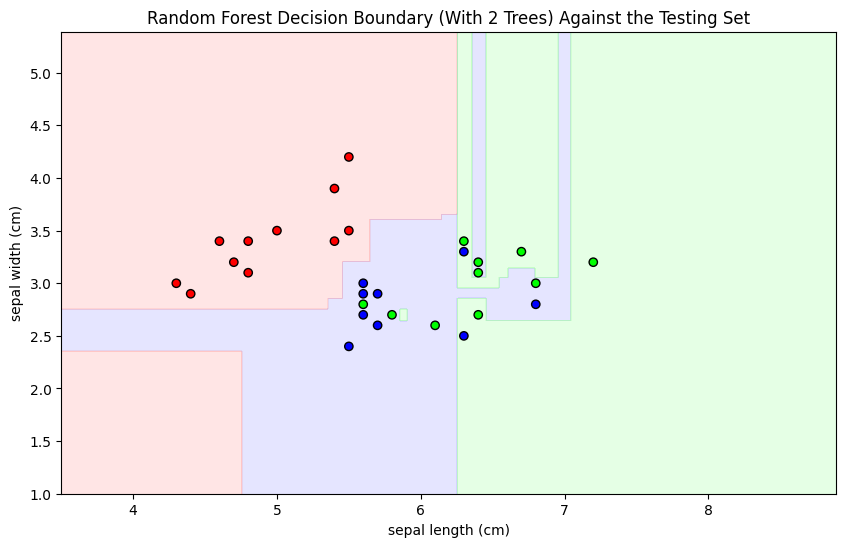

In [7]:
# Create a meshgrid for the decision boundary plot that covers features
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

# Predict the class labels for the corresponding meshgrid points using features
mesh_points = np.c_[xx.ravel(), yy.ravel()]
Z = rf_classifier.predict(mesh_points)
Z = Z.reshape(xx.shape)

# Create a color map for the plot
cmap_background = ListedColormap(['#FFAAAA', '#AAAAFF', '#AAFFAA'])
cmap_points = ListedColormap(['#FF0000', '#0000FF', '#00FF00'])

# Plot the decision boundary
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, cmap=cmap_background, alpha=0.3)
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cmap_points, marker='o', edgecolor='k')

# Set axis labels and title
plt.xlabel(data.feature_names[0])
plt.ylabel(data.feature_names[1])
plt.title(f'Random Forest Decision Boundary (With {best_count} Trees) Against the Testing Set')

plt.show()

Notice that for this example, the random forest and decision tree performed at comparable levels. In general, however, random forests will perform better. Decision trees are less complex. And as we know from studying concepts like AIC and BIC, these two elements must be balanced to avoid overfitting or underfitting. 